# Setup

In [86]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

from datetime import datetime
import time

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "svm"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Large Margin Classification

In [87]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris['data'][:, (2, 3)]
y = iris['target']

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

svm_clf = SVC(kernel='linear', C=float('inf'))
svm_clf.fit(X, y)

SVC(C=inf, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [88]:
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

In [89]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
  w = svm_clf.coef_[0]
  b = svm_clf.intercept_[0]
  
  x0 = np.linspace(xmin, xmax, 200)
  decision_boundary = -w[0]/w[1] * x0 - b/w[1]
  
  margin = 1/w[1]
  gutter_up = decision_boundary + margin
  gutter_down = decision_boundary - margin
  
  svs = svm_clf.support_vectors_
  plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
  plt.plot(x0, decision_boundary, 'k-', linewidth=2)
  plt.plot(x0, gutter_up, 'k--', linewidth=2)
  plt.plot(x0, gutter_down, 'k--', linewidth=2)

Saving figure large_margin_classification_plot


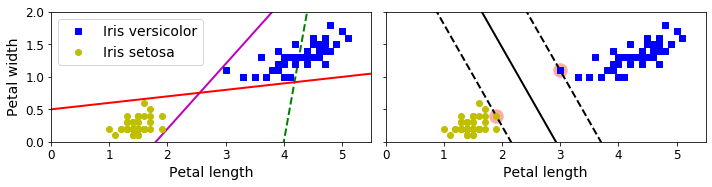

In [90]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 2.7), sharey=True)

plt.sca(axes[0])
plt.plot(x0, pred_1, 'g--', linewidth=2)
plt.plot(x0, pred_2, 'm-', linewidth=2)
plt.plot(x0, pred_3, 'r-', linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'bs', label='Iris versicolor')
plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'yo', label='Iris setosa')
plt.xlabel('Petal length', fontsize=14)
plt.ylabel('Petal width', fontsize=14)
plt.legend(loc='upper left', fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'bs')
plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'yo')
plt.xlabel('Petal length', fontsize=14)
plt.axis([0, 5.5, 0, 2])

save_fig('large_margin_classification_plot')
plt.show()

# Sensitivity to feature scales

Saving figure sensitivity_to_freature_scaled_plot


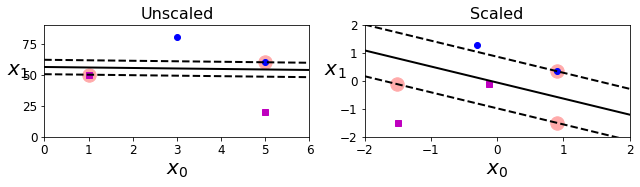

In [91]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel='linear', C=100)
svm_clf.fit(Xs, ys)

plt.figure(figsize=(9, 2.7))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], 'bo')
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], 'ms')
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel('$x_0$', fontsize=20)
plt.ylabel('$x_1$', fontsize=20, rotation=0)
plt.title('Unscaled', fontsize=16)
plt.axis([0, 6, 0, 90])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], 'bo')
plt.plot(X_scaled[:, 1][ys==0], X_scaled[:, 1][ys==0], 'ms')
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel('$x_0$', fontsize=20)
plt.ylabel("$x'_1$", fontsize=20, rotation=0)
plt.title('Scaled', fontsize=16)
plt.axis([-2, 2, -2, 2])

save_fig('sensitivity_to_freature_scaled_plot')

# Sensitivity to outliers

Saving figure sensitivity_to_outliers_plot


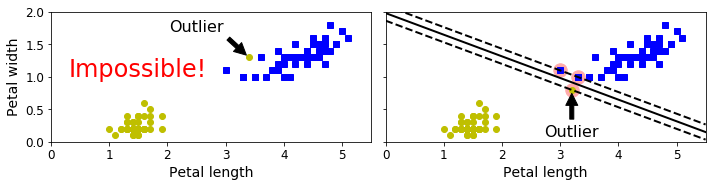

In [92]:
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel='linear', C=10**9)
svm_clf2.fit(Xo2, yo2)

fig, axes = plt.subplots(ncols=2, figsize=(10, 2.7), sharey=True)

plt.sca(axes[0])
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], 'bs')
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], 'yo')
plt.text(0.3, 1.0, 'Impossible!', fontsize=24, color='red')
plt.xlabel('Petal length', fontsize=14)
plt.ylabel('Petal width', fontsize=14)
plt.annotate('Outlier', xy=(X_outliers[0][0], X_outliers[0][1]), xytext=(2.5, 1.7), ha='center', arrowprops=dict(facecolor='black', shrink=0.1), fontsize=16)
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], 'bs')
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], 'yo')
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel('Petal length', fontsize=14)
plt.annotate('Outlier', xy=(X_outliers[1][0], X_outliers[1][1]), xytext=(3.2, 0.08), ha='center', arrowprops=dict(facecolor='black', shrink=0.1), fontsize=16)
plt.axis([0, 5.5, 0, 2])
save_fig('sensitivity_to_outliers_plot')
plt.show()

# Large margin *vs* margin violations

In [93]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris['data'][:, (2, 3)]
y = (iris['target'] == 2).astype(np.float64)

svm_clf = Pipeline([
  ('scaler', StandardScaler()),
  ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))
])

svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [94]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [95]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss='hinge', random_state=42)
svm_clf2 = LinearSVC(C=100, loss='hinge', random_state=42)

scaled_svm_clf1 = Pipeline([
  ('scaler', scaler),
  ('linear_svc', svm_clf1)
])

scaled_svm_clf2 = Pipeline([
  ('scaler', scaler),
  ('linear_svc', svm_clf2)
])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

/opt/miniconda3/envs/tensorflow2/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=100, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [96]:
# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

Saving figure regularization_plot


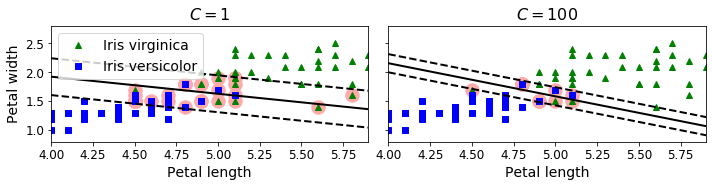

In [97]:
fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 5.9)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

plt.sca(axes[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 5.99)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

save_fig("regularization_plot")

# Non-linear classification

In [98]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

Saving figure higher_dimensions_plot


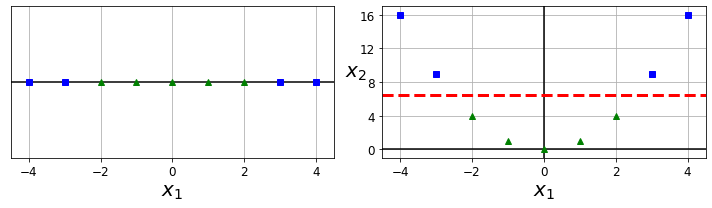

In [99]:
plt.figure(figsize=(10, 3))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), 'bs')
plt.plot(X1D[:, 0][y==1], np.zeros(5), 'g^')
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r'$x_1$', fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], 'bs')
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], 'g^')
plt.xlabel(r'$x_1$', fontsize=20)
plt.ylabel(r'$x_2$', fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], 'r--', linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)

save_fig('higher_dimensions_plot', tight_layout=True)
plt.show()

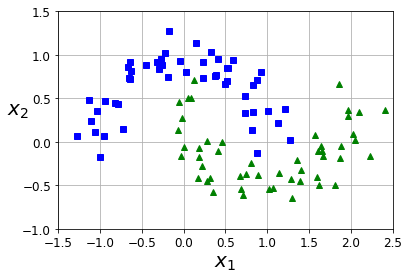

In [100]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
  plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'bs')
  plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'g^')
  plt.axis(axes)
  plt.grid(True, which='both')
  plt.xlabel(r'$x_1$', fontsize=20)
  plt.ylabel(r'$x_2$', fontsize=20, rotation=0)
  
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [101]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
  ('poly_features', PolynomialFeatures(degree=3)),
  ('scaler', StandardScaler()),
  ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))
])

polynomial_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

Saving figure moons_polynomial_svc_plot


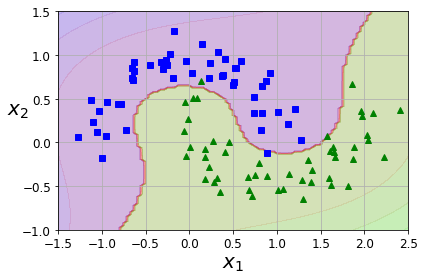

In [102]:
def plot_predictions(clf, axes):
  x0s = np.linspace(axes[0], axes[1], 100)
  x1s = np.linspace(axes[2], axes[3], 100)
  x0, x1 = np.meshgrid(x0s, x1s)
  X = np.c_[x0.ravel(), x1.ravel()]
  y_pred = clf.predict(X).reshape(x0.shape)
  y_decision = clf.decision_function(X).reshape(x0.shape)
  plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
  plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
  
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

save_fig('moons_polynomial_svc_plot')
plt.show()

In [103]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
  ('scaler', StandardScaler()),
  ('svm_clf', SVC(kernel='poly', degree=3, coef0=1, C=5))
])

poly_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, cache_size=200, class_weight=None, coef0=1,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [104]:
poly100_kernel_svm_clf = Pipeline([
  ('scaler', StandardScaler()), 
  ('svm_clf', SVC(kernel='poly', degree=10, coef0=100, C=5))
])
poly100_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, cache_size=200, class_weight=None, coef0=100,
                     decision_function_shape='ovr', degree=10,
                     gamma='auto_deprecated', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

Saving figure moons_kernelized_polynomial_svc_plot


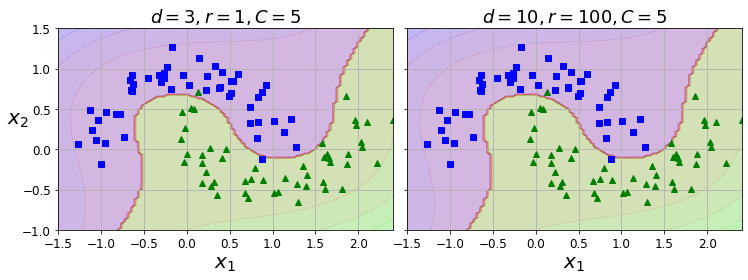

In [105]:
fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r'$d=3, r=1, C=5$', fontsize=18)

plt.sca(axes[1])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r'$d=10, r=100, C=5$', fontsize=18)
plt.ylabel('')

save_fig('moons_kernelized_polynomial_svc_plot')
plt.show()

In [106]:
def gaussian_rbf(x, landmark, gamma):
  return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

Saving figure kernel_method_plot


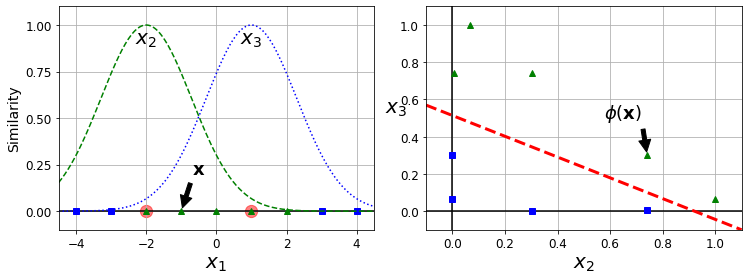

In [107]:
plt.figure(figsize=(10.5, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c='red')
plt.plot(X1D[:, 0][yk==0], np.zeros(4), 'bs')
plt.plot(X1D[:, 0][yk==1], np.zeros(5), 'g^')
plt.plot(x1s, x2s, 'g--')
plt.plot(x1s, x3s, 'b:')
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r'$x_1$', fontsize=20)
plt.ylabel(r'Similarity', fontsize=14)
plt.annotate(r'$\mathbf{x}$', xy=(X1D[3, 0], 0), xytext=(-0.5, 0.2), ha='center', arrowprops=dict(facecolor='black', shrink=0.1), fontsize=18)
plt.text(-2, 0.9, '$x_2$', ha='center', fontsize=20)
plt.text(1, 0.9, '$x_3$', ha='center', fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], 'bs')
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], 'g^')
plt.xlabel(r'$x_2$', fontsize=20)
plt.ylabel(r'$x_3$', fontsize=20, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$', xy=(XK[3, 0], XK[3, 1]), xytext=(0.65, 0.5), ha='center', arrowprops=dict(facecolor='black', shrink=0.1), fontsize=18)
plt.plot([-0.1, 1.1], [0.57, -0.1], 'r--', linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])

plt.subplots_adjust(right=1)

save_fig('kernel_method_plot')
plt.show()

In [108]:
x1_example = X1D[3, 0]
for landmark in (-2, 1):
  k = gaussian_rbf(np.array([[x1_example]]), np.array([[landmark]]), gamma)
  print('Phi({}, {}) = {}'.format(x1_example, landmark, k))

Phi(-1.0, -2) = [0.74081822]
Phi(-1.0, 1) = [0.30119421]


In [109]:
rbf_kernel_svm_clf = Pipeline([
  ('scaler', StandardScaler()),
  ('svm_clf', SVC(kernel='rbf', gamma=5, C=0.001))
])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=5,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

Saving figure moons_rbf_svc_plot


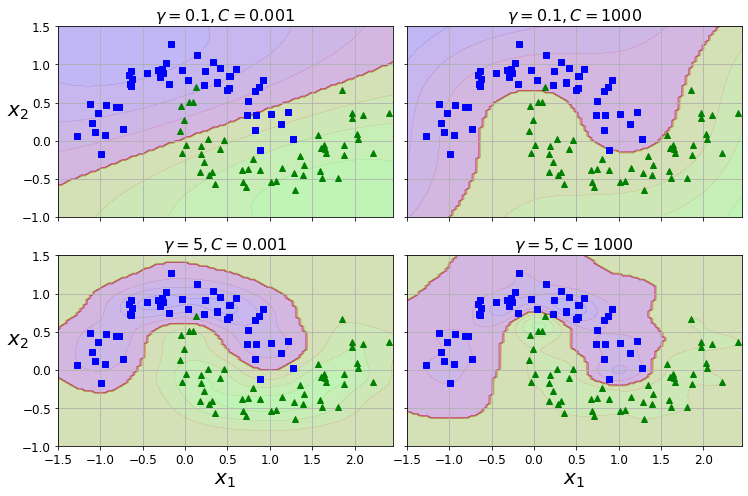

In [110]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000

hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
  rbf_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='rbf', gamma=gamma, C=C))
  ])
  rbf_kernel_svm_clf.fit(X, y)
  svm_clfs.append(rbf_kernel_svm_clf)
  
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
  plt.sca(axes[i // 2, i % 2])
  plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
  plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
  gamma, C = hyperparams[i]
  plt.title(r'$\gamma = {}, C = {}$'.format(gamma, C), fontsize=16)
  if i in (0, 1):
    plt.xlabel('')
  if i in (1, 3):
    plt.ylabel('')
    
save_fig('moons_rbf_svc_plot')
plt.show()

# Regression

In [111]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [112]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X, y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=42, tol=0.0001, verbose=0)

In [113]:
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

LinearSVR(C=1.0, dual=True, epsilon=0.5, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=42, tol=0.0001, verbose=0)

In [114]:
def find_support_vectors(svm_reg, X, y):
  y_pred = svm_reg.predict(X)
  off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
  return np.argwhere(off_margin)

In [115]:
svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

In [116]:
eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

In [117]:
def plot_svm_regression(svm_reg, X, y, axes):
  x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
  y_pred = svm_reg.predict(x1s)
  plt.plot(x1s, y_pred, 'k-', linewidth=2, label=r'$\hat{y}$')
  plt.plot(x1s, y_pred + svm_reg.epsilon, 'k--')
  plt.plot(x1s, y_pred - svm_reg.epsilon, 'k--')
  plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
  plt.plot(X, y, 'bo')
  plt.xlabel(r'$x_1$', fontsize=18)
  plt.legend(loc='upper left', fontsize=18)
  plt.axis(axes)

Saving figure svm_regression_plot


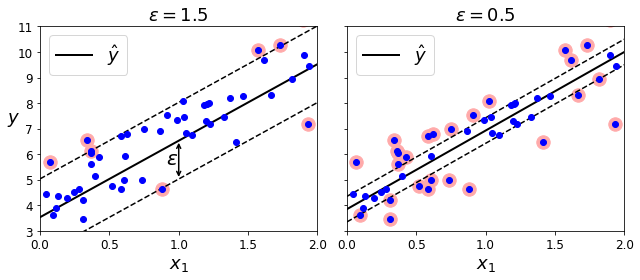

In [118]:
fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r'$\epsilon = {}$'.format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r'$y$', fontsize=18, rotation=0)
plt.annotate('', xy=(eps_x1, eps_y_pred), xycoords='data', xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon), textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5})
plt.text(0.91, 5.6, r'$\epsilon$', fontsize=20)
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r'$\epsilon = {}$'.format(svm_reg2.epsilon), fontsize=18)
save_fig('svm_regression_plot')
plt.show()

In [119]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

In [120]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel='poly', degree=2, C=100, epsilon=0.1, gamma='scale')
svm_poly_reg.fit(X, y)

SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [121]:
from sklearn.svm import SVR

svm_poly_reg1 = SVR(kernel='poly', degree=2, C=100, epsilon=0.1, gamma='scale')
svm_poly_reg2 = SVR(kernel='poly', degree=2, C=0.01, epsilon=0.1, gamma='scale')
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

SVR(C=0.01, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Saving figure svm_with_polynomial_kernel_plot


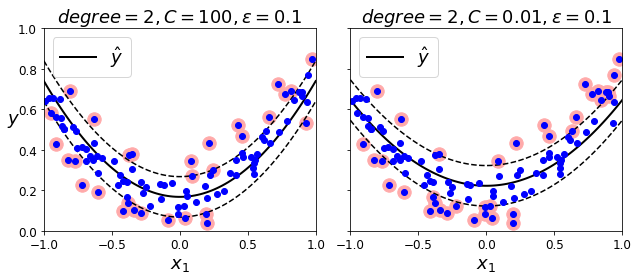

In [122]:
fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r'$degree={}, C={}, \epsilon = {}$'.format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r'$y$', fontsize=18, rotation=0)
plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r'$degree={}, C={}, \epsilon = {}$'.format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)
save_fig('svm_with_polynomial_kernel_plot')
plt.show()

# Under the hood

In [123]:
iris = datasets.load_iris()
X = iris['data'][:, (2, 3)]
y = (iris['target'] == 2).astype(np.float64)

In [124]:
from mpl_toolkits.mplot3d import Axes3D

Saving figure iris_3D_plot


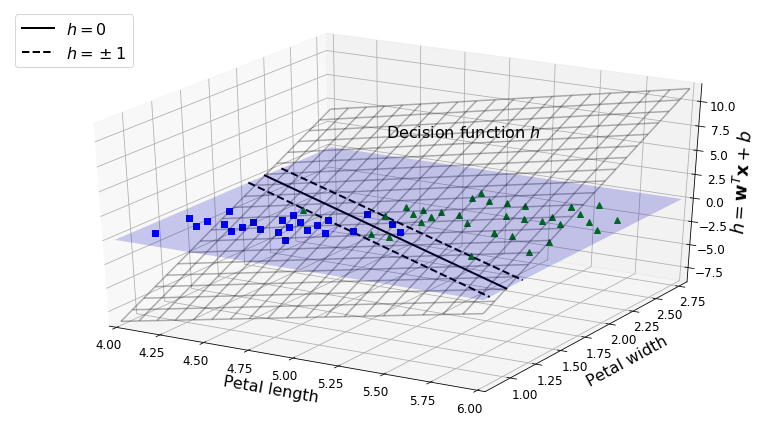

In [125]:
def plot_3D_decision_function(ax, w, b, x1_lim=[4, 6], x2_lim=[0.8, 2.8]):
  x1_in_bounds = (X[:, 0] > x1_lim[0]) & (X[:, 0] < x1_lim[1])
  X_crop = X[x1_in_bounds]
  y_crop = y[x1_in_bounds]
  x1s = np.linspace(x1_lim[0], x1_lim[1], 20)
  x2s = np.linspace(x2_lim[0], x2_lim[1], 20)
  x1, x2 = np.meshgrid(x1s, x2s)
  xs = np.c_[x1.ravel(), x2.ravel()]
  df = (xs.dot(w) + b).reshape(x1.shape)
  m = 1 / np.linalg.norm(w)
  boundary_x2s = -x1s*(w[0]/w[1])-b/w[1]
  margin_x2s_1 = -x1s*(w[0]/w[1])-(b-1)/w[1]
  margin_x2s_2 = -x1s*(w[0]/w[1])-(b+1)/w[1]
  ax.plot_surface(x1s, x2, np.zeros_like(x1), color='b', alpha=0.2, cstride=100, rstride=100)
  ax.plot(x1s, boundary_x2s, 0, 'k-', linewidth=2, label=r'$h=0$')
  ax.plot(x1s, margin_x2s_1, 0, 'k--', linewidth=2, label=r'$h=\pm 1$')
  ax.plot(x1s, margin_x2s_2, 0, 'k--', linewidth=2)
  ax.plot(X_crop[:, 0][y_crop==1], X_crop[:, 1][y_crop==1], 0, 'g^')
  ax.plot_wireframe(x1, x2, df, alpha=0.3, color='k')
  ax.plot(X_crop[:, 0][y_crop==0], X_crop[:, 1][y_crop==0], 0, 'bs')
  ax.axis(x1_lim + x2_lim)
  ax.text(4.5, 2.5, 3.8, 'Decision function $h$', fontsize=16)
  ax.set_xlabel(r'Petal length', fontsize=16, labelpad=10)
  ax.set_ylabel(r'Petal width', fontsize=16, labelpad=10)
  ax.set_zlabel(r'$h = \mathbf{w}^T \mathbf{x} + b$', fontsize=18, labelpad=5)
  ax.legend(loc='upper left', fontsize=16)
  
fig = plt.figure(figsize=(11, 6))
ax1 = fig.add_subplot(111, projection='3d')
plot_3D_decision_function(ax1, w=svm_clf2.coef_[0], b=svm_clf2.intercept_[0])

save_fig('iris_3D_plot')
plt.show()

# Small weight vector results in a large margin

Saving figure small_w_large_margin_plot


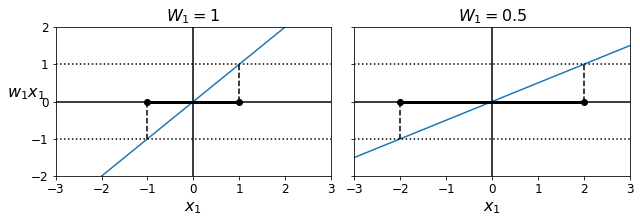

In [126]:
def plot_2D_decision_function(w, b, ylabel=True, x1_lim=[-3, 3]):
  x1 = np.linspace(x1_lim[0], x1_lim[1], 200)
  y = w * x1 + b
  m = 1 / w
  
  plt.plot(x1, y)
  plt.plot(x1_lim, [1, 1], 'k:')
  plt.plot(x1_lim, [-1, -1], 'k:')
  plt.axhline(y=0, color='k')
  plt.axvline(x=0, color='k')
  plt.plot([m, m], [0, 1], 'k--')
  plt.plot([-m, -m], [0, -1], 'k--')
  plt.plot([-m, m], [0, 0], 'k-o', linewidth=3)
  plt.axis(x1_lim + [-2, 2])
  plt.xlabel(r'$x_1$', fontsize=16)
  if ylabel:
    plt.ylabel(r'$w_1 x_1$ ', rotation=0, fontsize=16)
    
  plt.title(r'$W_1 = {}$'.format(w), fontsize=16)
  
fig, axes = plt.subplots(ncols=2, figsize=(9, 3.2), sharey=True)
plt.sca(axes[0])
plot_2D_decision_function(1, 0)
plt.sca(axes[1])
plot_2D_decision_function(0.5, 0, ylabel=False)
save_fig('small_w_large_margin_plot')
plt.show()

In [127]:
from sklearn.svm import SVC
from sklearn import datasets

In [128]:
iris = datasets.load_iris()
X = iris['data'][:, (2, 3)]
y = (iris['target'] == 2).astype(np.float64)

In [129]:
svm_clf = SVC(kernel='linear', C=1)
svm_clf.fit(X, y)
svm_clf.predict([[5.3, 1.3]])

array([1.])

# Hinge loss

In [130]:
t = np.linspace(-2, 4, 200)
h = np.where(1 - t < 0, 0, 1 - t)

Saving figure hinge_plot


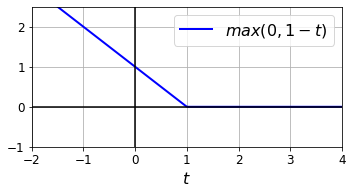

In [131]:
plt.figure(figsize=(5, 2.8))
plt.plot(t, h, 'b-', linewidth=2, label='$max(0, 1 - t)$')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.yticks(np.arange(-1, 2.5, 1))
plt.xlabel('$t$', fontsize=16)
plt.axis([-2, 4, -1, 2.5])
plt.legend(loc='upper right', fontsize=16)
save_fig('hinge_plot')
plt.show()

# Extra material

## Training time

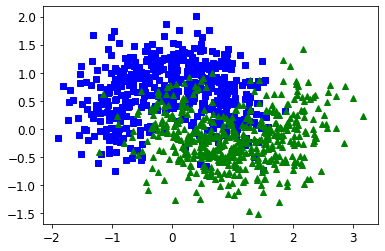

In [132]:
X, y = make_moons(n_samples=1000, noise=0.4, random_state=42)
plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'bs')
plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'g^')

In [133]:
from time import time
import pandas as pd

tol = 0.1
tols = []
times = []
for i in range(10):
  svm_clf = SVC(kernel='poly', gamma=3, C=10, tol=tol, verbose=1)
  t1 = time()
  svm_clf.fit(X, y)
  t2 = time()
  times.append(t2 - t1)
  tols.append(tol)
  tol /= 10


[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

In [134]:

print(pd.DataFrame({'time': times, 'precision': tols}))


       time     precision
0  0.277200  1.000000e-01
1  0.272700  1.000000e-02
2  0.302780  1.000000e-03
3  0.450962  1.000000e-04
4  0.752401  1.000000e-05
5  0.775146  1.000000e-06
6  0.813063  1.000000e-07
7  0.783447  1.000000e-08
8  0.850963  1.000000e-09
9  0.875514  1.000000e-10


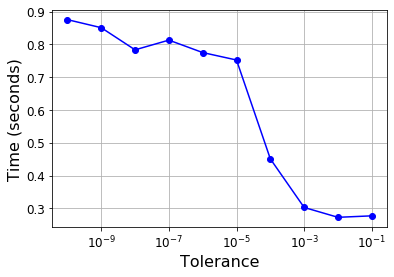

In [135]:
plt.semilogx(tols, times, 'bo-')
plt.xlabel('Tolerance', fontsize=16)
plt.ylabel('Time (seconds)', fontsize=16)
plt.grid(True)
plt.show()

## Linear SVM classifier implementation using Batch Gradient Descent


In [136]:
X = iris['data'][:, (2, 3)]
y = (iris['target'] == 2).astype(np.float64).reshape(-1, 1)

In [137]:
from sklearn.base import BaseEstimator

In [138]:
class MyLinearSVC(BaseEstimator):
  def __init__(self, C=1, eta0=1, eta_d=1e4, n_epochs=1000, random_state=None):
    self.C = C
    self.eta0 = eta0
    self.n_epochs = n_epochs
    self.random_state = random_state
    self.eta_d = eta_d
    
  def eta(self, epoch):
    return self.eta0 / (epoch + self.eta_d)
  
  def fit(self, X, y):
    if self.random_state:
      np.random.seed(self.random_state)
    w = np.random.randn(X.shape[1], 1)
    b = 0
    
    m = len(X)
    t = y * 2 - 1
    X_t = X * t
    self.Js = []
    
    for epoch in range(self.n_epochs):
      support_vectors_idx = (X_t.dot(w) + t * b < 1).ravel()
      X_t_sv = X_t[support_vectors_idx]
      t_sv = t[support_vectors_idx]
      
      J = 1/2 * np.sum(w * w) + self.C * (np.sum(1 - X_t_sv.dot(w)) - b * np.sum(t_sv))
      self.Js.append(J)
      
      w_gradient_vector = w - self.C * np.sum(X_t_sv, axis=0).reshape(-1, 1)
      b_derivative = -C * np.sum(t_sv)
      
      w = w - self.eta(epoch) * w_gradient_vector
      b = b - self.eta(epoch) * b_derivative
      
    self.intercept_ = np.array([b])
    self.coef_ = np.array([w])
    support_vectors_idx = (X_t.dot(w) + t * b < 1).ravel()
    self.support_vectors_ = X[support_vectors_idx]
    return self
  
  def decision_function(self, X):
    return X.dot(self.coef_[0]) + self.intercept_[0]
  
  def predict(self, X):
    return (self.decision_function(X) >= 0).astype(np.float64)

In [139]:
C = 2
svm_clf = MyLinearSVC(C=C, eta0=10, eta_d=1000, n_epochs=60000, random_state=2)
svm_clf.fit(X, y)
svm_clf.predict(np.array([[5, 2], [4, 1]]))

array([[1.],
       [0.]])

[0, 60000, 0, 100]

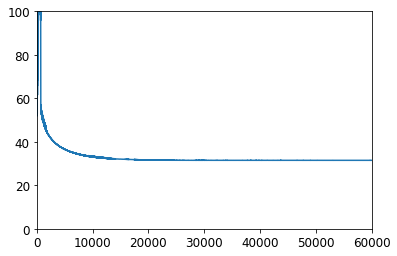

In [140]:
plt.plot(range(svm_clf.n_epochs), svm_clf.Js)
plt.axis([0, svm_clf.n_epochs, 0, 100])

In [141]:
print(svm_clf.intercept_, svm_clf.coef_)

[-15.56761653] [[[2.28120287]
  [2.71621742]]]


In [142]:
svm_clf2 = SVC(kernel='linear', C=C)
svm_clf2.fit(X, y.ravel())
print(svm_clf2.intercept_, svm_clf2.coef_)

[-15.51721253] [[2.27128546 2.71287145]]


[4, 6, 0.8, 2.8]

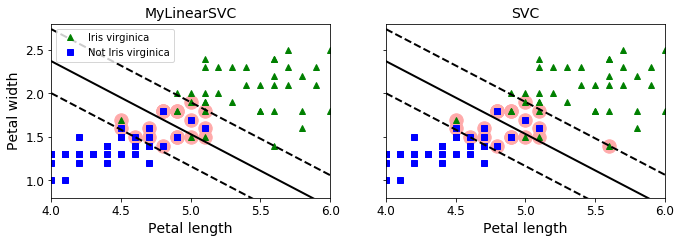

In [143]:
yr = y.ravel()
fig, axes = plt.subplots(ncols=2, figsize=(11, 3.2), sharey=True)
plt.sca(axes[0])
plt.plot(X[:, 0][yr==1], X[:, 1][yr==1], 'g^', label='Iris virginica')
plt.plot(X[:, 0][yr==0], X[:, 1][yr==0], 'bs', label='Not Iris virginica')
plot_svc_decision_boundary(svm_clf, 4, 6)
plt.xlabel('Petal length', fontsize=14)
plt.ylabel('Petal width', fontsize=14)
plt.title('MyLinearSVC', fontsize=14)
plt.axis([4, 6, 0.8, 2.8])
plt.legend(loc='upper left')

plt.sca(axes[1])
plt.plot(X[:, 0][yr==1], X[:, 1][yr==1], 'g^')
plt.plot(X[:, 0][yr==0], X[:, 1][yr==0], 'bs')
plot_svc_decision_boundary(svm_clf2, 4, 6)
plt.xlabel('Petal length', fontsize=14)
plt.title('SVC', fontsize=14)
plt.axis([4, 6, 0.8, 2.8])

In [144]:
from sklearn.linear_model import SGDClassifier

In [145]:
sgd_clf = SGDClassifier(loss='hinge', alpha=0.017, max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X, y.ravel())

SGDClassifier(alpha=0.017, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

[-12.52988101   1.94162342   1.84544824]


[4, 6, 0.8, 2.8]

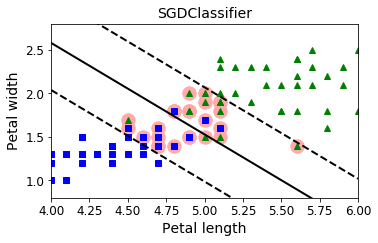

In [146]:
m = len(X)
t = y * 2 - 1
X_b = np.c_[np.ones((m, 1)), X]
X_b_t = X_b * t
sgd_theta = np.r_[sgd_clf.intercept_[0], sgd_clf.coef_[0]]
print(sgd_theta)
support_vectors_idx = (X_b_t.dot(sgd_theta) < 1).ravel()
sgd_clf.support_vectors_ = X[support_vectors_idx]
sgd_clf.C = C

plt.figure(figsize=(5.5, 3.2))
plt.plot(X[:, 0][yr==1], X[:, 1][yr==1], 'g^')
plt.plot(X[:, 0][yr==0], X[:, 1][yr==0], 'bs')
plot_svc_decision_boundary(sgd_clf, 4, 6)
plt.xlabel('Petal length', fontsize=14)
plt.ylabel('Petal width', fontsize=14)
plt.title('SGDClassifier', fontsize=14)
plt.axis([4, 6, 0.8, 2.8])

# Exercise solutions

## 8

In [147]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris['data'][:, (2, 3)]
y = iris['target']

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [148]:
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

C = 5
alpha = 1 / (C * len(X))

lin_clf = LinearSVC(loss='hinge', C=C, random_state=42)
svm_clf = SVC(kernel='linear', C=C)
sgd_clf = SGDClassifier(loss='hinge', learning_rate='constant', eta0=0.001, alpha=alpha, max_iter=1000, tol=1e-3, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lin_clf.fit(X_scaled, y)
svm_clf.fit(X_scaled, y)
sgd_clf.fit(X_scaled, y)

print('LinearSVC: ', lin_clf.intercept_, lin_clf.coef_)
print('SVC: ', svm_clf.intercept_, svm_clf.coef_)
print('SGDClassifier(alpha={:.5f}):'.format(sgd_clf.alpha), sgd_clf.intercept_, sgd_clf.coef_)

LinearSVC:  [0.28474532] [[1.05364923 1.09903601]]
SVC:  [0.31896852] [[1.1203284  1.02625193]]
SGDClassifier(alpha=0.00200): [0.117] [[0.77714169 0.72981762]]


In [149]:
w1 = -lin_clf.coef_[0, 0]/lin_clf.coef_[0, 1]
b1 = -lin_clf.intercept_[0]/lin_clf.coef_[0, 1]
w2 = -svm_clf.coef_[0, 0]/svm_clf.coef_[0, 1]
b2 = -svm_clf.intercept_[0]/svm_clf.coef_[0, 1]
w3 = -sgd_clf.coef_[0, 0]/sgd_clf.coef_[0, 1]
b3 = -sgd_clf.intercept_[0]/sgd_clf.coef_[0, 1]

In [150]:
line1 = scaler.inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
line2 = scaler.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = scaler.inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])

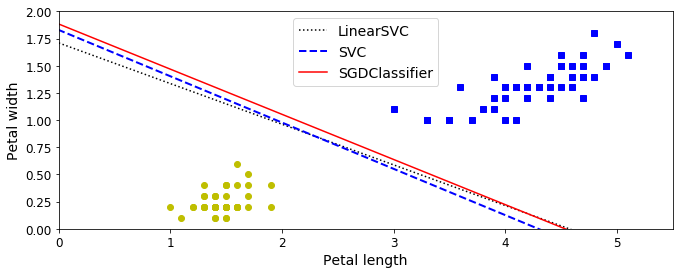

In [151]:
plt.figure(figsize=(11, 4))
plt.plot(line1[:, 0], line1[:, 1], 'k:', label='LinearSVC')
plt.plot(line2[:, 0], line2[:, 1], 'b--', linewidth=2, label='SVC')
plt.plot(line3[:, 0], line3[:, 1], 'r-', label='SGDClassifier')
plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'bs')
plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'yo')
plt.xlabel('Petal length', fontsize=14)
plt.ylabel('Petal width', fontsize=14)
plt.legend(loc='upper center', fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.show()

## 9

In [152]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)

X = mnist['data']
y = mnist['target'].astype(np.uint8)

X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = X[60000:]

In [ ]:
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = lin_clf.predict(X_train)
accuracy_score(y_train, y_pred)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.transform(X_test.astype(np.float32))

In [ ]:
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train_scaled, y_train)

In [ ]:
y_pred = lin_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

In [ ]:
svm_clf = SVC(gamma='scale')
svm_clf.fit(X_train_scaled[:10000], y_train[:10000])

In [ ]:
y_pred = svm_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {'gamma': reciprocal(0.001, 0.1), 'C': uniform(1, 10)}
rnd_search_cv= RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, verbose=2, cv=3, n_jobs=1)
rnd_search_cv.fit(X_train_scaled[:1000], y_train[:1000])

In [ ]:
rnd_search_cv.best_estimator_

In [ ]:
rnd_search_cv.best_score_

In [ ]:
start = datetime.now()
rnd_search_cv.best_estimator_.fit(X_train_scaled, y_train)
print(datetime.now() - start)

In [ ]:
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

In [ ]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

## 10

In [ ]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X = housing['data']
y = housing['target']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.svm import LinearSVR

lin_svr = LinearSVR(random_state=42)
%timeit -r 1 -n 1 lin_svr.fit(X_train_scaled, y_train)

In [ ]:
from sklearn.metrics import mean_squared_error

%timeit -r 1 -n 1 y_pred = lin_svr.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
mes

In [ ]:
np.sqrt(mse)

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {'gamma': reciprocal(0.001, 0.1), 'C': uniform(1, 10)}


In [ ]:
%%timeit -r 1 -n 1
rnd_search_cv = RandomizedSearchCV(SVR(), param_distributions, n_iter=10, verbose=2, cv=3, random_state=42)

In [ ]:
rnd_search_cv.best_estimator_

In [ ]:
%%timeit -r 1 -n 1
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
np.sqrt(mse)

In [ ]:
%%timeit -r 1 -n 1
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
np.sqrt(mse)